In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from skimage import color
import itertools as it
import math
import time

import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper
from src import picture_cross

In [2]:
import logging
logger = logging.getLogger()

In [3]:
width = 19.5
height = 19.5
plt.rcParams['figure.figsize'] = [width, height]

In [4]:
# For autotesting
%load_ext autoreload
%autoreload 2

In [5]:
def generate_gaussians(gaussians):
    return [helper.get_gaussian(*gaussian)[2] for gaussian in gaussians]

## Zwei Gaussians
Einer statisch, einer bewegt sich in jeder möglichen Richtung

In [6]:
size = 200

### Statischer Gaussian

In [7]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5

In [8]:
gaussian_static = [x_min, x_max, y_min, y_max, [mu_x,mu_y], [[variance_x, 0],[0, variance_y]], size]

In [9]:
colorscheme_generator = color_schemes.create_color_brewer_colorscheme
colorscheme_names = ["red", "purple", "green", "orange", "blue'"]

In [10]:
colorschemes = [{"colorscheme": colorscheme_generator, "colorscheme_name": colorscheme_name} for colorscheme_name in colorscheme_names]

In [11]:
gaussians_2d = []
for mu_x, variance_x, mu_y, variance_y in it.permutations([-5, -2, 0, 2, 5, 10, 15],4):
    if not (variance_x < 0 or variance_y < 0 or variance_x == 0 or variance_y == 0) and not (mu_x > 4 or mu_y > 4) and not(mu_x < -2 or mu_y < -2):
        gaussians_2d.append([x_min, x_max, y_min, y_max, [mu_x,mu_y], [[variance_x, 0],[0, variance_y]], size])

In [12]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5

var_x, var_y = [2,5,10,15,20], [15,20]
gaussians_2d = []
for i,mu_y in enumerate([-5,-2,0,2,5]):
    for j,mu_x in enumerate([-5,-2,0,2,5]):
        if mu_y > 0:
            variance_y = var_y[i-3]
            variance_x = var_x[j]
        else: variance_x = 5
        gaussians_2d.append([x_min, x_max, y_min, y_max, [mu_x,mu_y], [[variance_x, 2],[2, variance_y]], size])

In [13]:
gaussians_2 = []
for i in range(len(gaussians_2d)):
    gaussians_2.append([gaussian_static, gaussians_2d[i]])

In [14]:
from src import picture_cross

In [99]:
### without c-implementation 23.721891164779663s elapsed size = 200
start = time.time()
images_2 = []
z_sums = []
for i in range(len(gaussians_2)):
    z_list, image, z_sum = picture_cross.generate_image(gaussians_2[i], colorschemes, color_space ="lab", cross_size=5, use_c_implementation=True)
    images_2.append(image)
    z_sums.append(z_sum)
end = time.time()
print("{}s elapsed".format(end-start))

[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-5, -5], [[5, 2], [2, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2, -5], [[5, 2], [2, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, -5], [[5, 2], [2, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [2, -5], [[5, 2], [2, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [5, -5], [[5, 2], [2, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-5, -2], [[5, 2], [2, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [-2, -2], [[5, 2], [2, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [0, -2], [[5, 2], [2, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10, -10, 10, [2, -2], [[5, 2], [2, 5]], 200]]
[[-10, 10, -10, 10, [0, 0], [[5, 0], [0, 5]], 200], [-10, 10

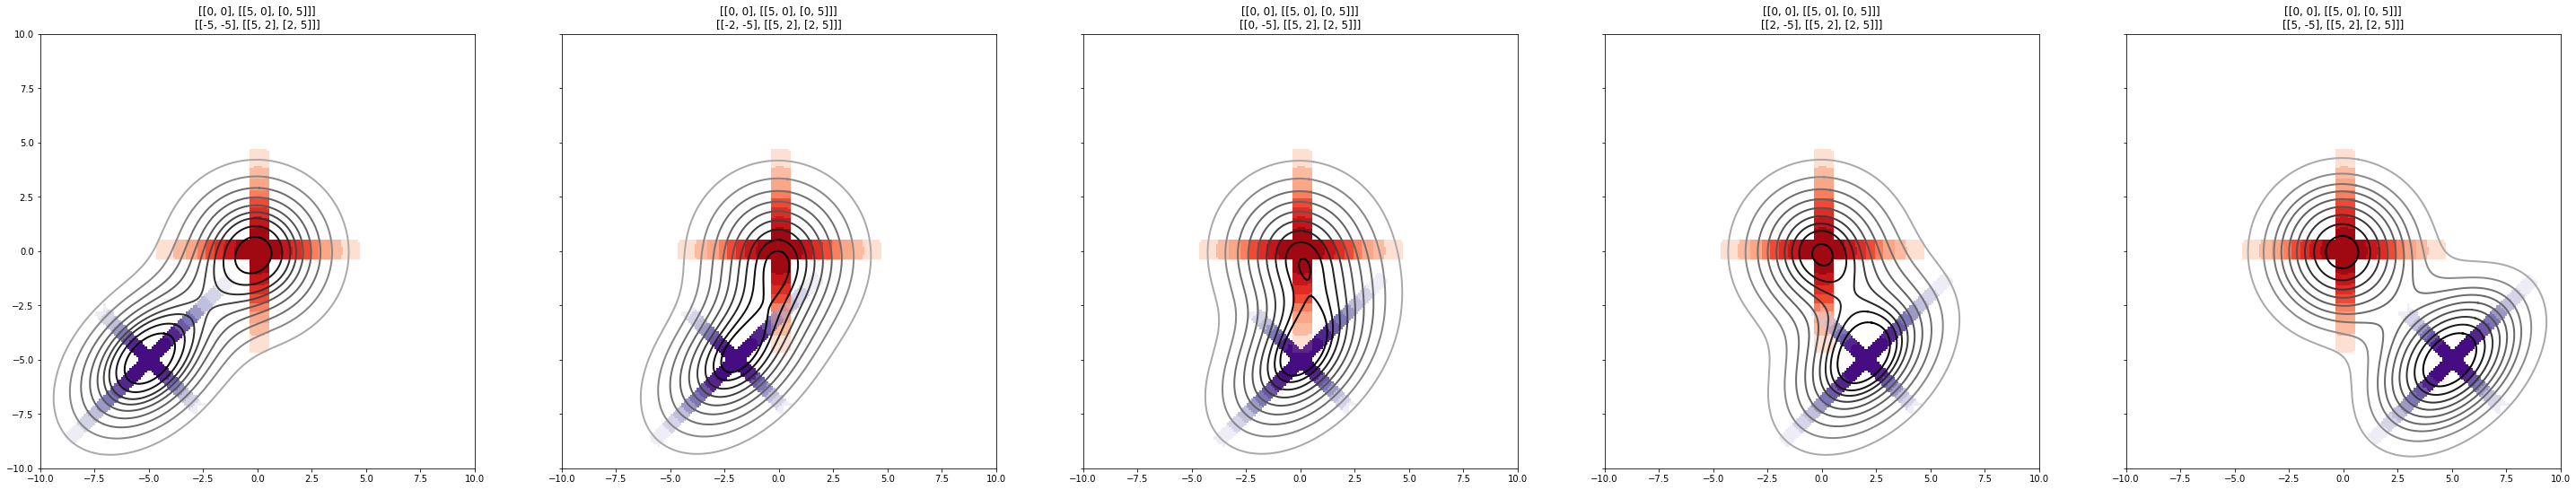

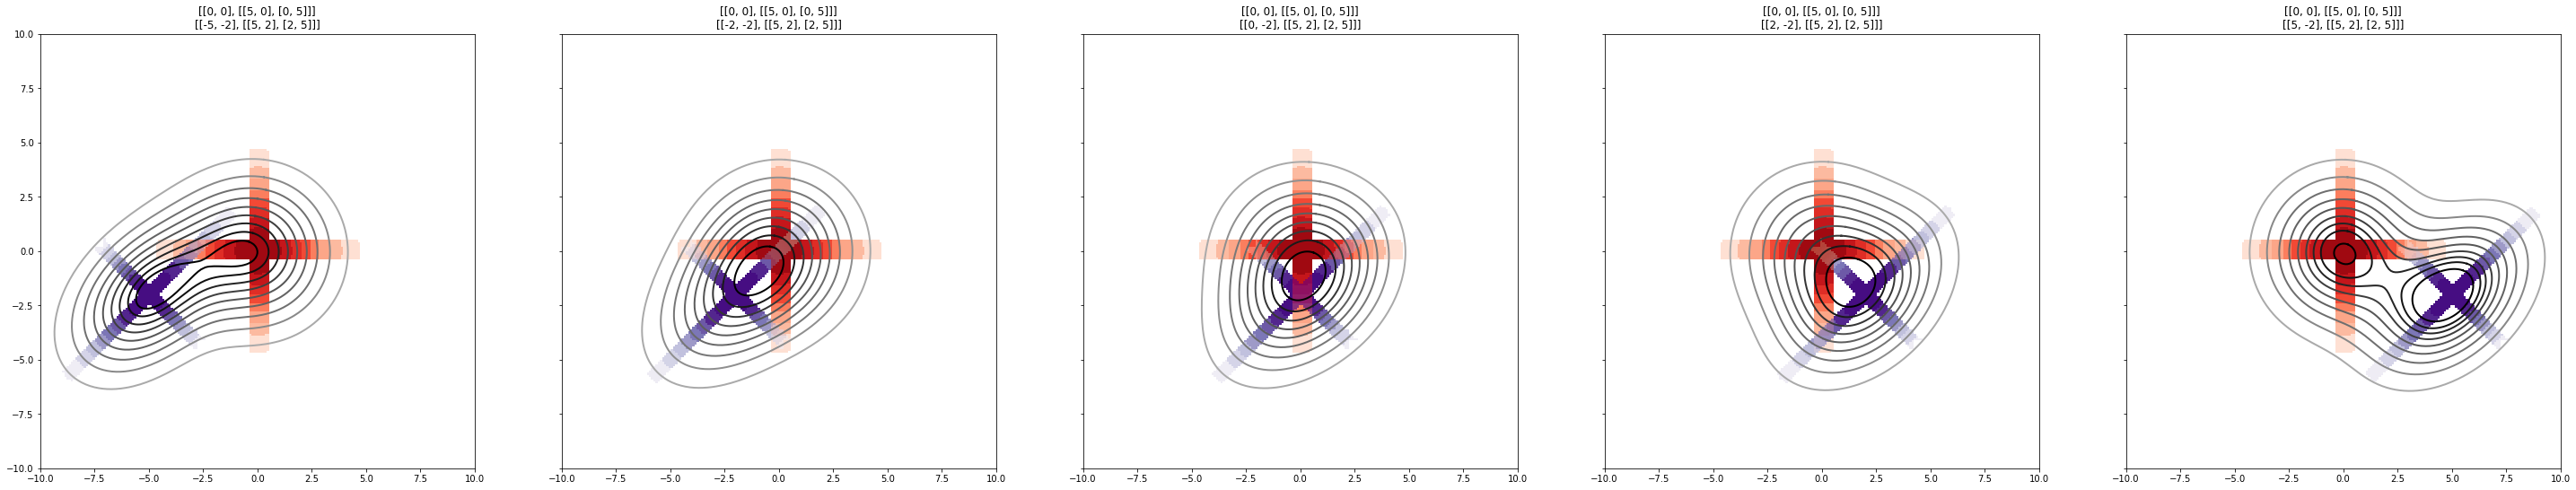

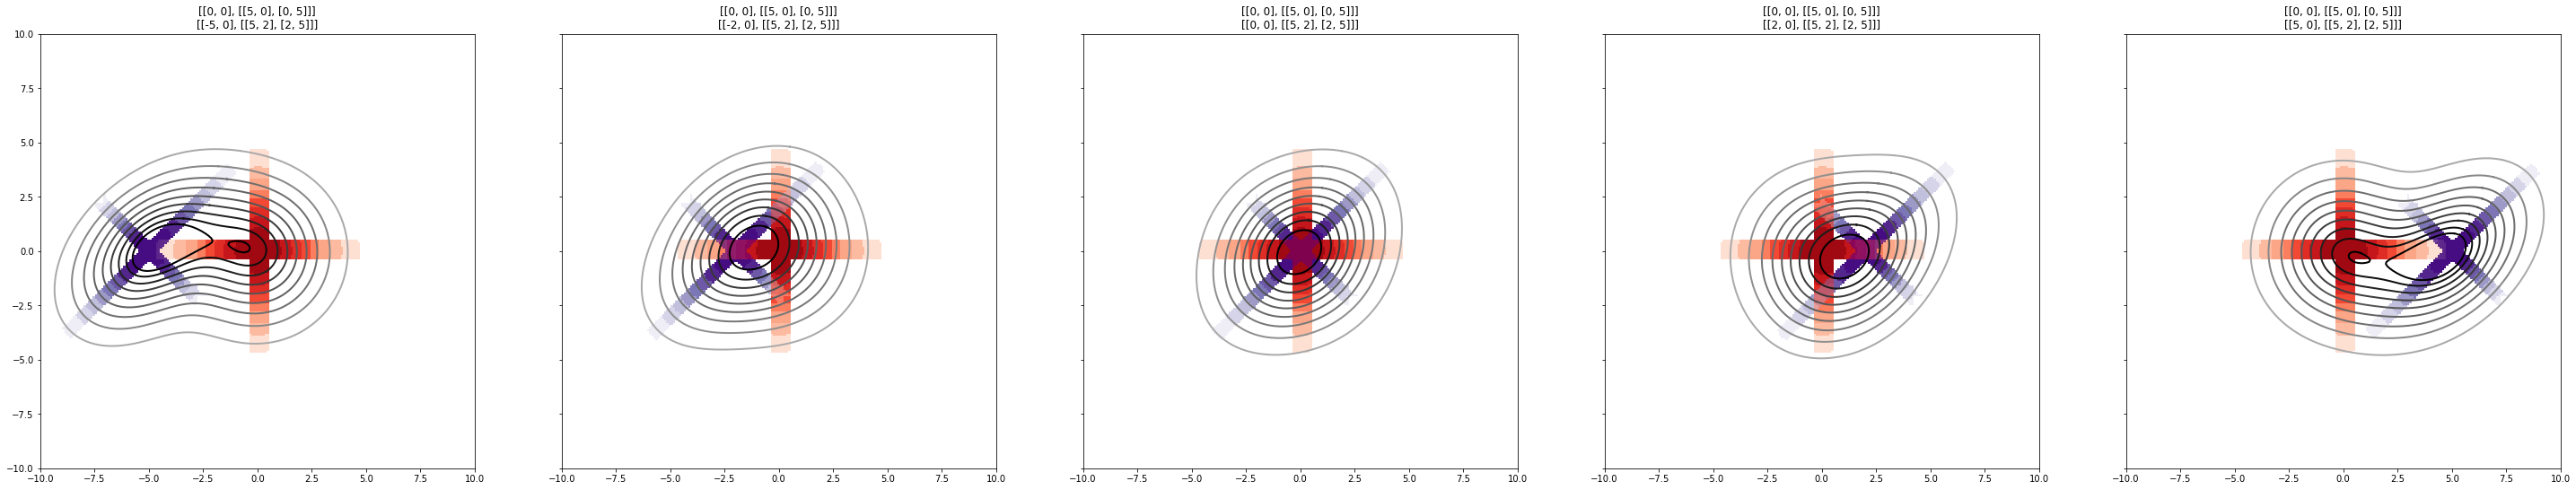

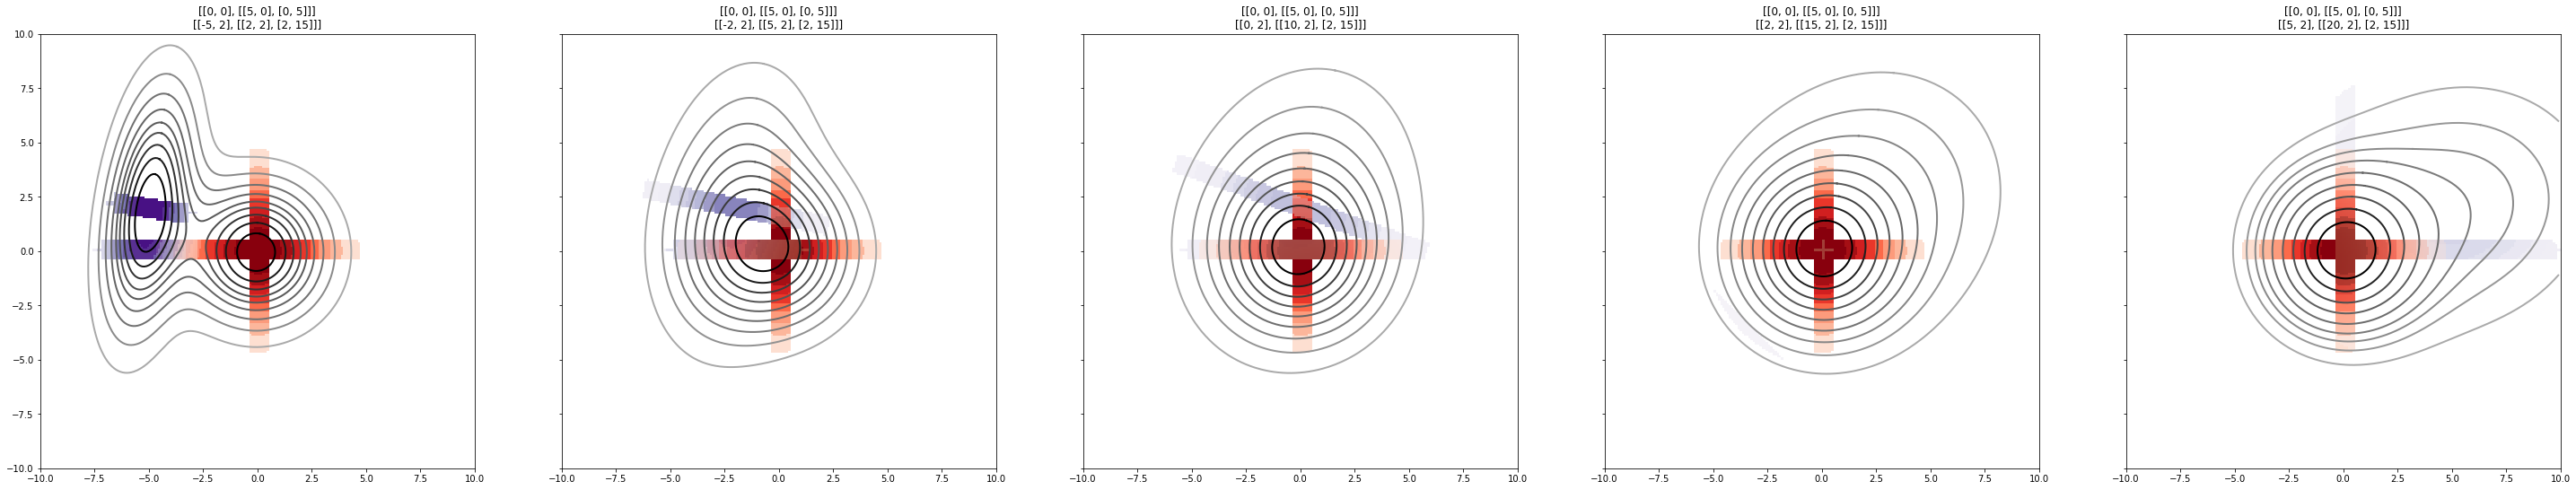

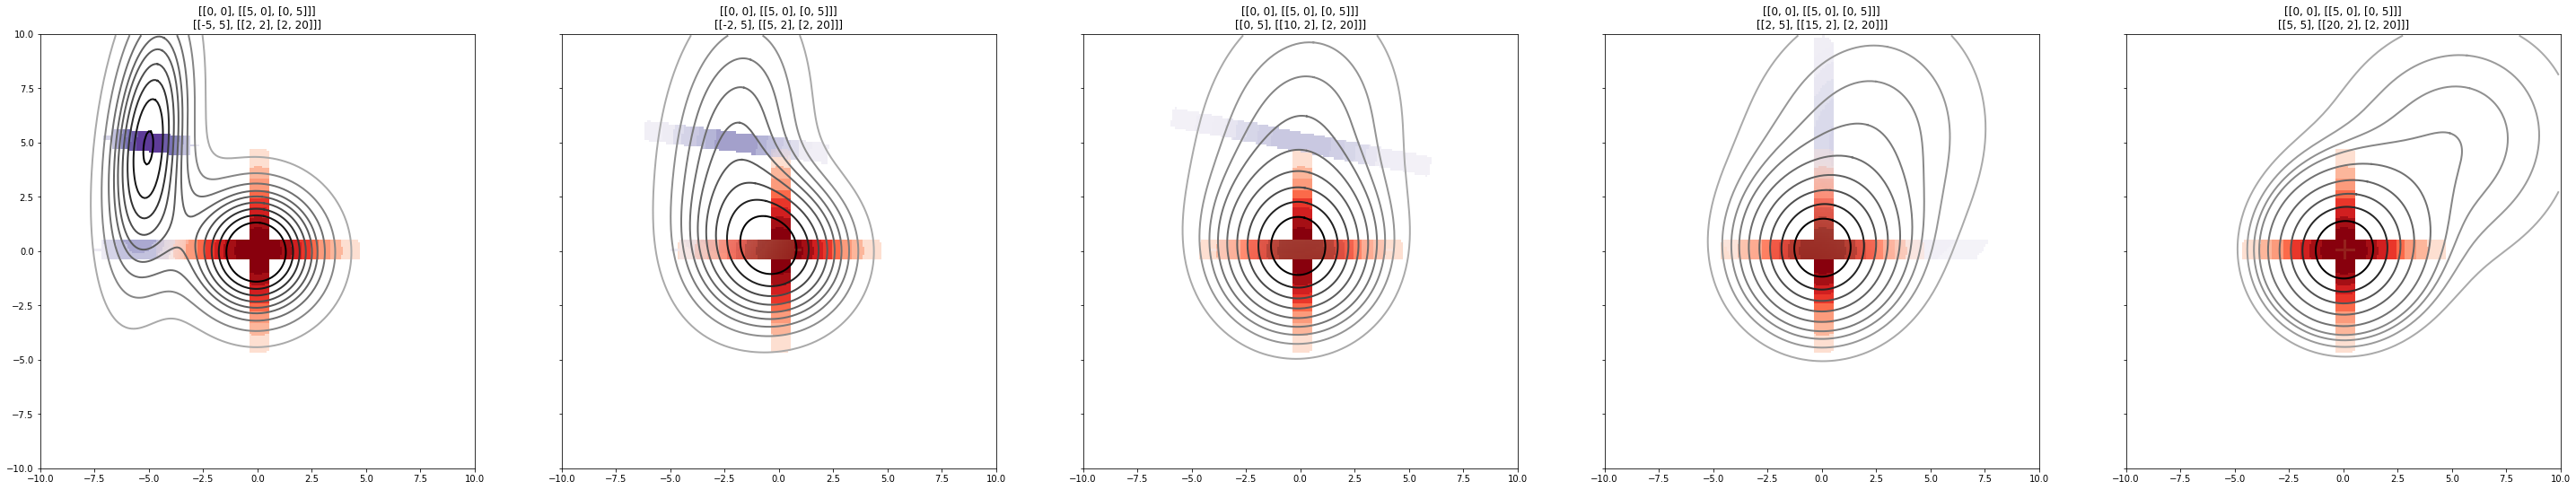

In [109]:
picture_worker.plot_images(images_2, gaussians_2, z_sums)

In [142]:
### without c-implementation 23.721891164779663s elapsed size = 200
start = time.time()
images_2_cross = []
z_sums_cross = []
for i in range(2): #len(gaussians_2)
    img_list = picture_cross_2.generate_image_lines(gaussians_2[i], colorschemes,0.5)
    
    z_list = helper.generate_gaussians(gaussians_2[i])
    _, _, z_sum = helper.generate_weights(z_list)
    images_2_cross.append(img_list)
    z_sums_cross.append(z_sum)
end = time.time()
print("{}s elapsed".format(end-start))

0.21825408935546875s elapsed


In [121]:
img_list[0][0][0]

((-5.0, -3.0), (-5.0, 3.0))

In [28]:
logger = logging.getLogger("src.picture_cross_2")

In [24]:
logging.basicConfig(level=logging.INFO)

In [105]:
logger.setLevel(logging.INFO)

In [236]:
from src import picture_cross_2

In [188]:
images_2_cross[0]

[autoreload of src.picture_cross_2 failed: Traceback (most recent call last):
  File "/home/laines/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/laines/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../src/picture_cross_2.py", line 186
    for line_1, line

[([((-5.0, -0.5), (-5.0, 0.5)),
   ((-4.242424242424242, -0.5), (-4.242424242424242, 0.5)),
   ((-3.333333333333333, -0.5), (-3.333333333333333, 0.5)),
   ((-2.676767676767677, -0.5), (-2.676767676767677, 0.5)),
   ((-2.070707070707071, -0.5), (-2.070707070707071, 0.5)),
   ((-1.4141414141414144, -0.5), (-1.4141414141414144, 0.5)),
   ((0.0, -0.5), (0.0, 0.5)),
   ((1.3131313131313131, -0.5), (1.3131313131313131, 0.5)),
   ((1.9696969696969697, -0.5), (1.9696969696969697, 0.5)),
   ((2.5757575757575757, -0.5), (2.5757575757575757, 0.5)),
   ((3.2323232323232323, -0.5), (3.2323232323232323, 0.5)),
   ((4.141414141414141, -0.5), (4.141414141414141, 0.5)),
   ((5.0, -0.5), (5.0, 0.5))],
  [((-0.5, -5.0), (0.5, -5.0)),
   ((-0.5, -4.242424242424242), (0.5, -4.242424242424242)),
   ((-0.5, -3.333333333333333), (0.5, -3.333333333333333)),
   ((-0.5, -2.676767676767677), (0.5, -2.676767676767677)),
   ((-0.5, -2.070707070707071), (0.5, -2.070707070707071)),
   ((-0.5, -1.4141414141414144), (0

In [ ]:
picture_cross_2.plot_images(images_2_cross, gaussians_2, z_sums_cross, linewidth_cross = 10)

AttributeError: 'list' object has no attribute 'exterior'